In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import pickle
import seaborn as sns
import skimage
import sys

ampis_root = pathlib.Path('../../src/')
assert ampis_root.is_dir()
sys.path.append(str(ampis_root))
from ampis.analyze import ordinal_hist_distance

In [2]:
with open('../../data/interim/instance_sets/particle_gt_instance_sets.pickle', 'rb') as f:
    gt_instances = pickle.load(f)
with open('../../data/interim/instance_sets/particle_pred_instance_sets.pickle', 'rb') as f:
    pred_instances = pickle.load(f)

In [3]:
#pred = pred_instances[-1]
df_pred = pd.concat([x.rprops for x in pred_instances])
df_gt = pd.concat([x.rprops for x in gt_instances])


In [4]:
def quickplot(key, x=df_gt, y=df_pred,log=False, bin_width_k=1):
    
    
    xdata = x[key].to_numpy(dtype=np.float)
    ydata = y[key].to_numpy(dtype=np.float)
    
    colors = sns.color_palette('bright', 2)
    
    if log:
        xdata = np.log10(xdata)
        ydata = np.log10(ydata)
    
    
    _, xbins = np.histogram(xdata)
    _, ybins = np.histogram(ydata)
    
    bin_min = min(xbins.min(), ybins.min())
    bin_max = max(xbins.max(), ybins.max())
    
    xbinsize = xbins[1]-xbins[0]
    ybinsize = ybins[1]-ybins[0]
    minbinsize = min(xbinsize, ybinsize)
    
    nbins = int(((bin_max-bin_min)/minbinsize+1)*bin_width_k)
    
    new_bins = np.linspace(bin_min, bin_max, num =nbins)
    
    gt_hist, gt_bins = np.histogram(xdata, bins=new_bins)
    pred_hist, pred_bins = np.histogram(ydata, bins=new_bins)
    
    
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(xdata, bins=new_bins, color=colors[0], label='gt')
    sns.distplot(ydata, bins=new_bins, color=colors[1], label='pred')
    
    xlabel = key if not log else 'log ' + key
    ax.set_xlabel(xlabel)
    ax.set_ylabel("relative frequency")
    ax.legend(fontsize=14)
    plt.show()
    
    print('Normalized distance between histograms: {:.3f}'.format(ordinal_hist_distance(gt_hist, pred_hist)))
    binsizes = new_bins[1:]-new_bins[:-1]
    assert (binsizes.max()-binsizes.min()) / binsizes.min() < 0.001
    print('Bin size: {:.3f}'.format(binsizes[0]))
    
    
    
    
    

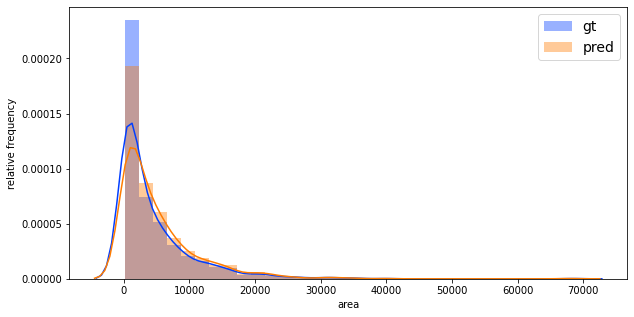

Normalized distance between histograms: 0.281
Bin size: 2138.156


In [5]:
quickplot('area', bin_width_k = 3)

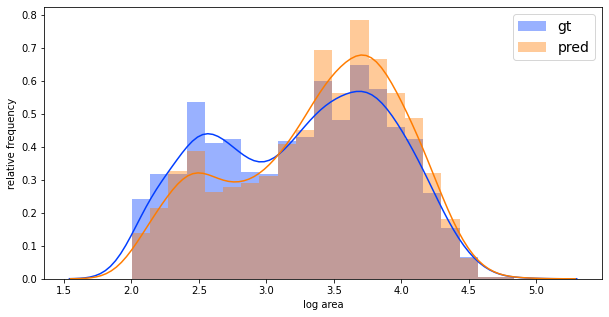

Normalized distance between histograms: 0.886
Bin size: 0.135


In [6]:
quickplot('area', log=True, bin_width_k = 2)

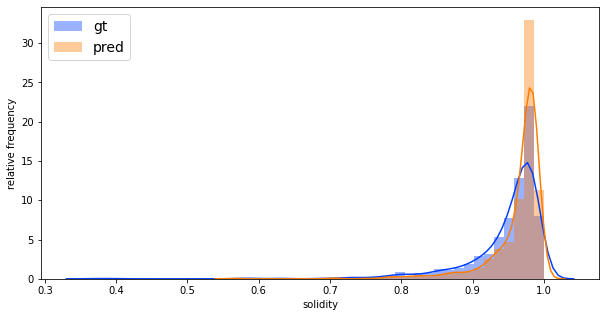

Normalized distance between histograms: 1.177
Bin size: 0.014


In [7]:
quickplot('solidity', bin_width_k = 3)

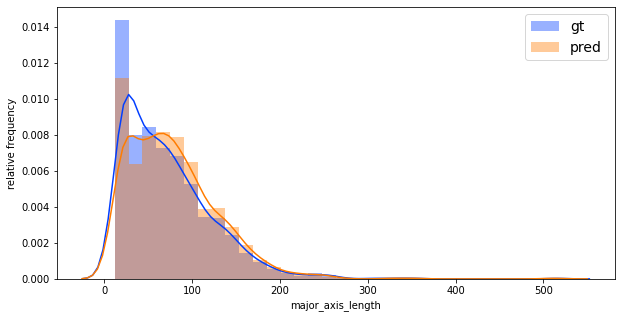

Normalized distance between histograms: 0.430
Bin size: 15.744


In [8]:
quickplot('major_axis_length', bin_width_k = 3)

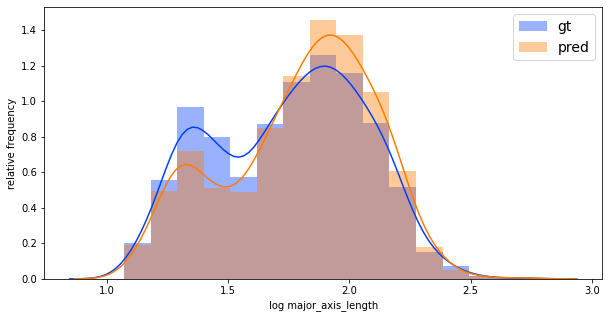

Normalized distance between histograms: 0.435
Bin size: 0.109


In [9]:
quickplot('major_axis_length', log=True, bin_width_k=1.5)